In [ ]:
import yfinance as yahooFinance
import pandas as pd

AAPL = yahooFinance.Ticker("AAPL")
aapl = pd.DataFrame(AAPL.history(period="5y"))
print(aapl.head())
aapl.to_csv('AAPL_5_years_data')
df = aapl

                                Open       High        Low      Close  \
Date                                                                    
2019-11-25 00:00:00-05:00  63.673187  64.577232  63.627136  64.560265   
2019-11-26 00:00:00-05:00  64.698425  64.751747  63.622299  64.056145   
2019-11-27 00:00:00-05:00  64.368797  64.950493  64.303360  64.916557   
2019-11-29 00:00:00-05:00  64.616020  64.955338  64.446358  64.773560   
2019-12-02 00:00:00-05:00  64.778397  65.015923  63.852547  64.024628   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-11-25 00:00:00-05:00   84020400        0.0           0.0  
2019-11-26 00:00:00-05:00  105207600        0.0           0.0  
2019-11-27 00:00:00-05:00   65235600        0.0           0.0  
2019-11-29 00:00:00-05:00   46617600        0.0           0.0  
2019-12-02 00:00:00-05:00   94487200        0.0           0.0  


<ipython-input-2-4e03ef5c11ee>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.fillna(df_numerical.mean(), inplace=True)


Explained Variance Ratio:
[0.88839367 0.11120099]
Total Explained Variance: 0.9995946615697716


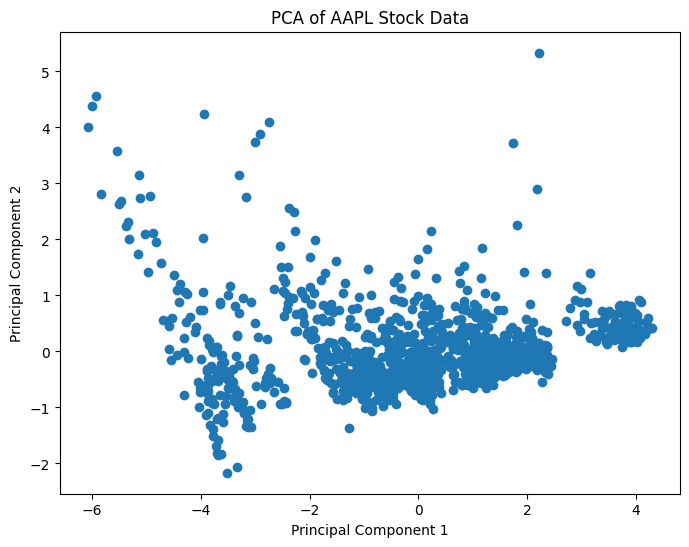

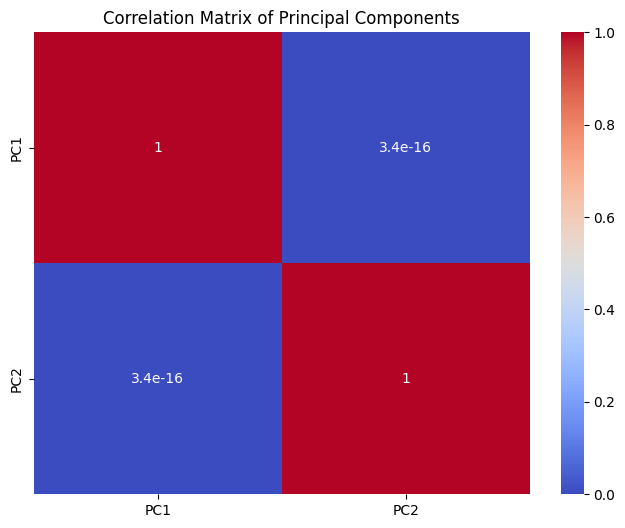

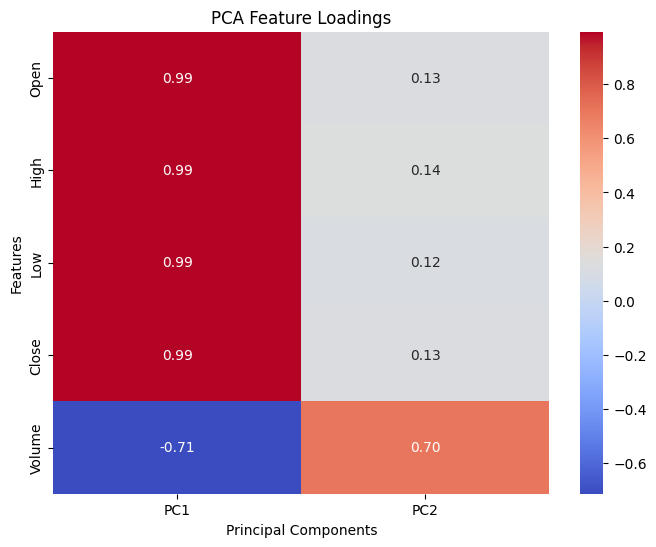

In [ ]:
  # prompt: Generate a code that does data exploration with graphs using PCA of the file AAPL_5_years_data.csv

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.preprocessing import StandardScaler
  from sklearn.decomposition import PCA
  import seaborn as sns

  # Load the dataset
  try:
    df = pd.read_csv('/content/AAPL_5_years_data', index_col='Date', parse_dates=True)
  except FileNotFoundError:
    print("Error: 'AAPL_5_years_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()


  # Data preprocessingl
  # Select numerical features for PCA
  numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']
  df_numerical = df[numerical_features]

  # Handle missing values (if any) - replace with mean for simplicity
  df_numerical.fillna(df_numerical.mean(), inplace=True)

  # Standardize the data
  scaler = StandardScaler()
  df_scaled = scaler.fit_transform(df_numerical)

  # Apply PCA
  pca = PCA(n_components=2) # Reduce to 2 principal components for visualization
  df_pca = pca.fit_transform(df_scaled)

  # Create a DataFrame for the PCA results
  df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'], index=df.index)

  # Explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_
  print(f"Explained Variance Ratio:\n{explained_variance_ratio}")
  print(f"Total Explained Variance: {sum(explained_variance_ratio)}")


  # Visualize the results
  plt.figure(figsize=(8, 6))
  plt.scatter(df_pca['PC1'], df_pca['PC2'])
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA of AAPL Stock Data')
  plt.show()


  # Heatmap of Correlation Matrix after PCA
  plt.figure(figsize=(8, 6))
  sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix of Principal Components')
  plt.show()


  # Feature Importance Visualization (using the loadings)
  loadings = pca.components_.T *  np.sqrt(pca.explained_variance_)
  loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numerical_features)
  plt.figure(figsize=(8, 6))
  sns.heatmap(loadings_df, annot=True, cmap="coolwarm", fmt=".2f")
  plt.title("PCA Feature Loadings")
  plt.xlabel('Principal Components')
  plt.ylabel('Features')
  plt.show()

**PCA Scatter Plot**
Around 0 , the underlying features are similar, but the further we go away from 0, the more they become dissimilar. This scatter plot shows some trends, which might indicate that there's a periodicity (since data is dates of closing values of AAPL stock) either in Volatility or stability.

**Correlation Matrix**
This heatmap shows the correlation between the principal components after dimensionality reduction.
As we can see in here, that the PC1 and PC2 are totally uncorrelated (uncorrelated by design in PCA), which might indicate a good choice of PC loadings.
Since we have a diagonal of ones, and zeros everywhere else, this confirms successful PCA decomposition.

**PCA Feature Loadings**
The fature loadings heatmap, shows that Open, High, Low and Close features has a strong influence on PC1, indicating its importance in explaining variability in the dataset.
While the same features have little to no impact on that principal component.
For the Volume feature, it has negative and positive loadings on PC1 and PC2 respectively.
This means , the higher the volume, the higher the value of PC2 and lower value of PC1.

<ipython-input-3-54526158805f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.fillna(df_numerical.mean(), inplace=True)


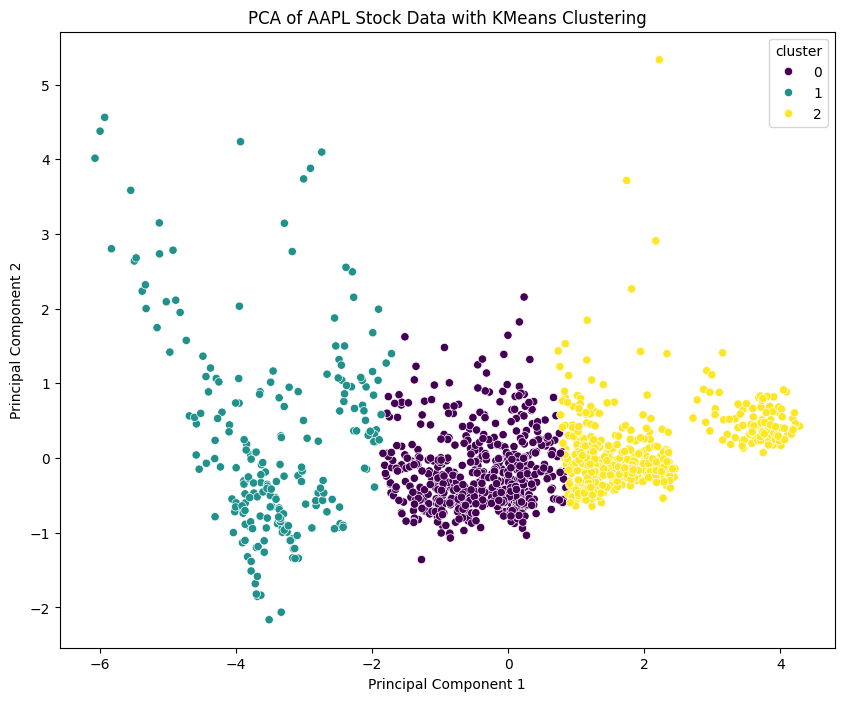

In [ ]:
# prompt: data exploration with graphs using Clustering of the file AAPL_5_years_data.csv

import yfinance as yahooFinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
try:
  df = pd.read_csv('/content/AAPL_5_years_data', index_col='Date', parse_dates=True)
except FileNotFoundError:
  print("Error: 'AAPL_5_years_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
  exit()

# Data preprocessing (same as before)
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']
df_numerical = df[numerical_features]
df_numerical.fillna(df_numerical.mean(), inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Apply PCA (same as before)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'], index=df.index)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=0) # You can adjust the number of clusters
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualization with Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('PCA of AAPL Stock Data with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Cluster 0**

Represents trading days with moderate price movement and trading activity.
Observations in this cluster might correspond to regular trading periods without extreme price swings or volume spikes.

**Cluster 1**

Reflects days with lower PC1 values, which might correspond to significant price drops, low trading volumes, or periods of market decline.
Negative PC1 values suggest these points differ strongly from clusters closer to the center of PC1.

**Cluster 2**

Corresponds to days with high PC1 values, which could indicate higher-than-average prices or trading volumes.
This cluster might represent periods of market growth or increased activity.

**Outliers**
Outliers here can represent exceptional trading days, significant market events, data anomalies, or special world events.

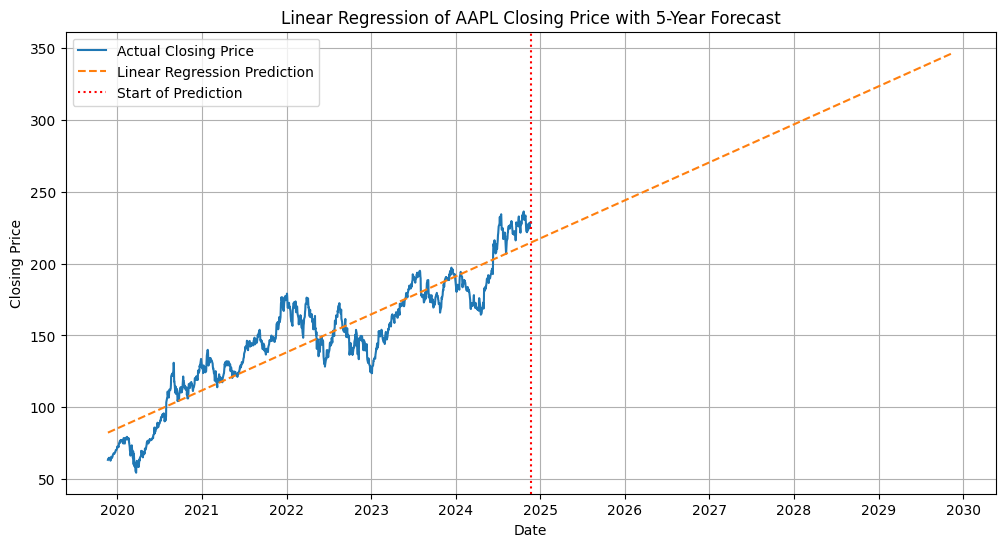

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('/content/AAPL_5_years_data', index_col='Date', parse_dates=True)
except FileNotFoundError:
    print("Error: 'AAPL_5_years_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()

# Prepare the data for linear regression
df = df.sort_index()  # Ensure the data is sorted by date
X = df.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)  # Convert index to ordinal values
y = df['Close']  # Use closing price as the dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for the existing data
y_pred = model.predict(X)

# Generate future dates for the next 5 years
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=5 * 365, freq='D')  # Approximate daily data for 5 years
future_X = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predict the closing prices for the future dates
future_y_pred = model.predict(future_X)

# Combine the current and future data for plotting
all_dates = np.concatenate([df.index, future_dates])
all_predictions = np.concatenate([y_pred, future_y_pred])

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, label='Actual Closing Price')
plt.plot(all_dates, all_predictions, label='Linear Regression Prediction', linestyle='--')
plt.axvline(x=last_date, color='red', linestyle=':', label='Start of Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Linear Regression of AAPL Closing Price with 5-Year Forecast')
plt.legend()
plt.grid(True)
plt.show()


**Blue fluctuations**

A clear upward trend is visible, indicating consistent growth in the stock price over the last 5 years.

**Linear regression prediction**

The dashed line shows the linear regression's fit to the historical data and its forecast for the next 5 years (2025-2030).

The model predicts a steady increase in the stock price, reflecting the continuation of the upward trend observed in the past.

**Future forecast**

Starting from the last observed price (approx. 250), the model forecasts an increase to 350 by the end of 2030.

This represents a projected growth of 100 units in the closing price over the next 5 years.

**Conclusions**

This simple linear approach provides a baseline forecast.

The forecast assumes a constant linear growth pattern, which may not account for market volatility, economic changes, or company-specific factors.

Linear regression may oversimplify stock price behavior, as actual prices often exhibit non-linear patterns due to market dynamics.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


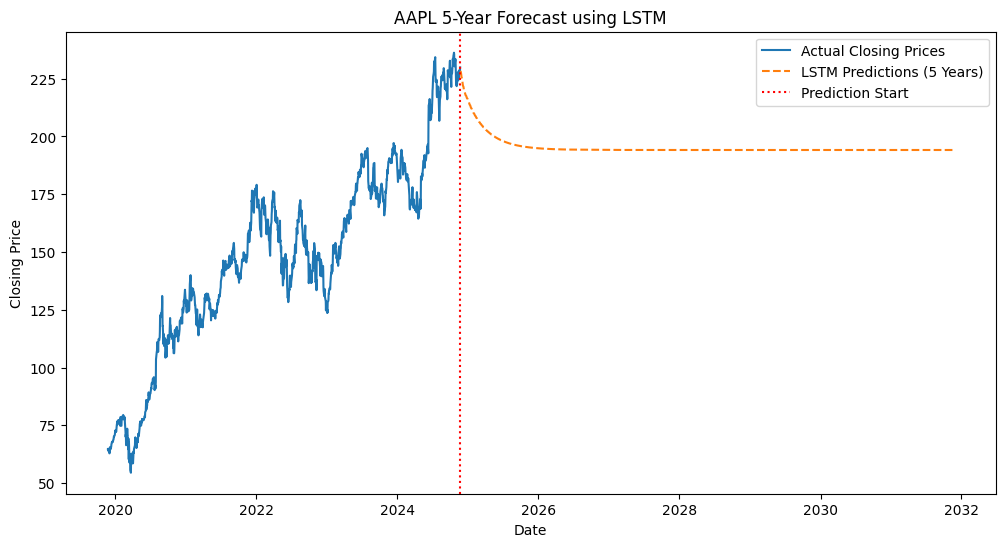

In [ ]:
# prompt: generate a code for AAPL_5_years_data  in contents using LSTM for Long-Term Prediction and predict the next 5 years

import os
import sys
import matplotlib.pyplot as plt
import yfinance as yahooFinance
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


class SuppressTFLogs:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')  # Redirect stdout to null
    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Load the data (assuming 'AAPL_5_years_data' is already created)
try:
    df = pd.read_csv('/content/AAPL_5_years_data', index_col='Date', parse_dates=True)
except FileNotFoundError:
    print("Error: 'AAPL_5_years_data' not found. Please ensure the file exists.")
    exit()

# Use 'Close' price for prediction
data = df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into training and testing sets (adjust as needed)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 50  # Adjust sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # Adjust epochs and batch size

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Predict the next 5 years (adjust as needed)
future_predictions = []
last_sequence = scaled_data[-seq_length:]  # Take the last `seq_length` from scaled data
last_sequence = np.reshape(last_sequence, (1, seq_length, 1))  # Reshape to match model input
with SuppressTFLogs():
    for _ in range(5 * 365):  # 5 years of daily data points
        next_prediction = model.predict(last_sequence)[0, 0]  # Predict the next value
        future_predictions.append(next_prediction)  # Save the prediction
        # Update the sequence by appending the new prediction and dropping the first value
        last_sequence = np.append(last_sequence[:, 1:, :], [[[next_prediction]]], axis=1)

last_date = df.index[-1]
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Closing Prices')
plt.plot(future_dates, future_predictions, label='LSTM Predictions (5 Years)', linestyle='--')
plt.axvline(x=last_date, color='red', linestyle=':', label='Prediction Start')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL 5-Year Forecast using LSTM')
plt.show()